# Análise Exploratória de Dados (EDA)

Caderno dedicado à análise exploratória de dados (EDA) com foco em entender como os dados estão distribuídos e na geração de insights para o negócio, por meio da manipulação e análise de dados com o uso de gráficos. Este caderno está organizado seguindo as seguintes etapas:

* 1. **Leitura dos dados**: Importação das bibliotecas e dos dados que serão utilizados.

* 2. **Perguntas de Partida e Hipóteses**: São feitas perguntas sobre os dados e, com base neles, hipóteses são formuladas com o objetivo de gerar insights sobre esses dados.

* 3. **Resolução das Perguntas**: Manipulação e visualização de dados para responder às perguntas de partida e, com base nelas, validar as hipóteses e gerar insights.

* 4. **Insights**: Resumo dos insights gerados durante a resolução das perguntas.


## 1. Leitura dos dados

* Bibliotecas:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from wordcloud import WordCloud

* Dados:

In [4]:
dados = pd.read_csv('../data/teste_atualizado_AE.csv')

In [6]:
dados.head()

id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1             0.72                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

* paleta de cores:

In [10]:
paleta_personalizada = ["#E01168", "#F877AD", "#E995B8", "#510524","#D0B2BE","#8C0038"]

## 2. Perguntas de Partida e Hipóteses

* **Perguntas de Partida**:

    1. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

    2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

    3. Existe algum padrão no texto do nome do local para lugares de maior valor?

    4. Qual o tipo de quarto com os maiores preços de acordo com o bairro?

    5. A quantidade de anúncios ativos afeta o valor do imóvel?

    6. Como o número de reviews se relaciona com o preço?

    7. Existe uma tendência temporal nas últimas reviews? Por exemplo, há mais reviews em determinados meses ou anos?

    8. Existe uma tendência temporal nos valores de preço? Por exemplo, o valor é maior em determinados meses ou anos?

    9. Qual a correlação entre todas as variáveis numéricas em relação ao preço?

* **Hipóteses**:

    1. Bairros populares, como Manhattan e Brooklyn, possuem preços maiores e mais disponibilidade de aluguéis.

    2. Quanto maior o número mínimo de noites, maior será o preço, e aluguéis com menor disponibilidade também são mais caros.

    3. O texto do nome do local não influencia no valor do aluguel.

    4. Quartos do tipo 'Entire home/apt' possuem valores maiores do que os demais tipos de quarto.

    5. Quanto mais anúncios ativos, maior será o valor do imóvel.

    6. Imóveis com mais reviews tendem a ter preços mais altos devido à maior popularidade.

    7. Imóveis com mais avaliações costumam ter uma circulação maior no período das férias e um aumento ao longo dos anos.

    8. O valor dos aluguéis vem aumentando a cada ano.

    9. Quanto maiores as variáveis numéricas, como número de anúncios, avaliações e mínimo de noites, maior será o valor do preço.


## 3. Resolução das Perguntas

* **1ª Pergunta**: Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [8]:
media_preco_bairro = dados.groupby(['bairro','bairro_group','latitude','longitude'])['price'].mean().reset_index()

In [15]:
fig = px.scatter_map(
    media_preco_bairro,
    lat='latitude',
    lon='longitude',
    color='bairro_group',  
    size='price',  
    hover_name='bairro', 
    hover_data={'price': ':.2f', 'latitude': False, 'longitude': False},
    zoom=10,  
    height=600, 
    title='Preço Médio por Bairro e Grupo de Bairros',
    size_max=15,  
    color_continuous_scale=px.colors.sequential.Viridis,  
)

fig.update_layout(
    mapbox_style="open-street-map",  
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    title_font_size=20,  
    title_x=0.5,  
    legend_title_text='Grupo de Bairros', 
)


fig.show()

> 1. Observamos que bairros como Manhattan e Brooklyn possuem uma quantidade maior de imóveis, com preços variando bastante e valores altos, mas também é possível encontrar valores mais baixos em áreas mais distantes do centro. Se o objetivo é economizar, bairros como Bronx, Staten Island e Queens podem ser melhores opções, sendo o último com uma variedade maior de opções de acordo com o gosto de quem irá alugar.

* **2ª Pergunta**: O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

In [13]:
media_por_preco = dados.groupby('bairro_group').agg({
    'price': 'mean',
    'disponibilidade_365': 'mean',
    'minimo_noites': 'mean',
}).reset_index()

C:\Users\micae\AppData\Local\Temp\ipykernel_5656\2732520616.py:2: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.



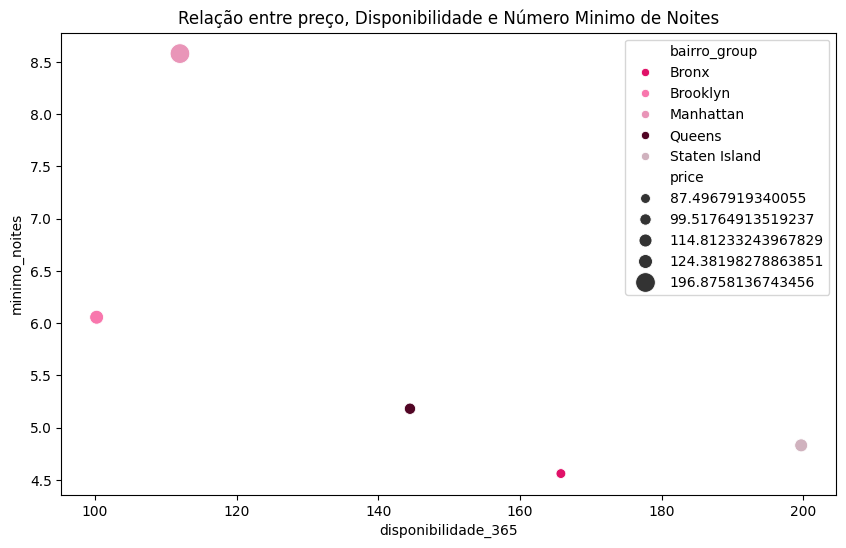

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=media_por_preco, x='disponibilidade_365', y='minimo_noites', hue='bairro_group', size='price', sizes=(50,200), palette=paleta_personalizada)
plt.title('Relação entre preço, Disponibilidade e Número Minimo de Noites')
plt.show()

> 2. Observa-se que, geralmente, um número maior de noites mínimas está associado a valores mais altos. Bairros como Manhattan e Brooklyn têm um número mínimo de noites maior (8,5 e 6,5, respectivamente) e preços mais elevados (197 milhões e 124 milhões, respectivamente), além de menor disponibilidade (114 dias e 100 dias, respectivamente). Por outro lado, bairros como Bronx, Queens e Staten Island possuem maior disponibilidade ao longo do ano e preços mais baixos, sendo boas opções para quem deseja economizar. No entanto, Staten Island pode ser mais caro que os outros dois, e o Bronx pode ter a desvantagem de um número mínimo de noites menor.

* **3ª Pergunta**: Existe algum padrão no texto do nome do local para lugares de maior valor?

In [16]:
alto_valor = dados[dados['price']> dados['price'].mean()]

In [17]:
texto = ' '.join(alto_valor['nome'])

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

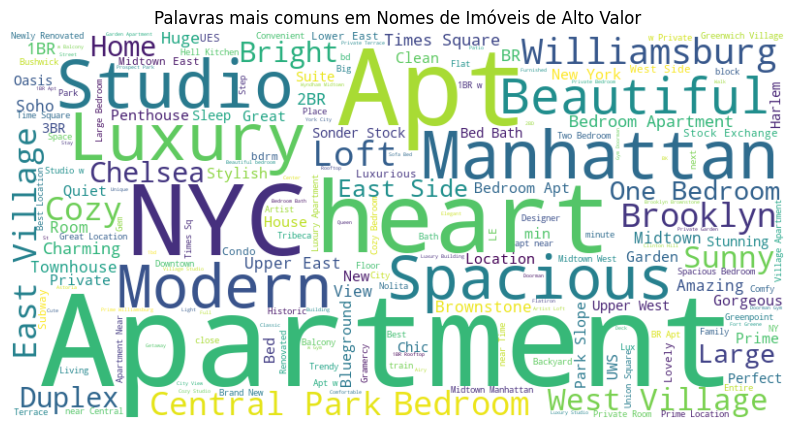

In [13]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais comuns em Nomes de Imóveis de Alto Valor')
plt.show()

In [11]:
palavras_chave = ['Studio','heart','Manhattan','NYC','Modern','Apartment','Apt','Luxury','Beautiful','Spacious']

In [12]:
for palavra in palavras_chave:
    dados[palavra] = dados['nome'].str.contains(palavra, case=False)

In [13]:
for palavra in palavras_chave:
    print(f"Preço médio para imóveis com '{palavra}': {dados[dados[palavra]]['price'].mean():.2f}")
    print(f"Preço médio para imóveis sem '{palavra}': {dados[~dados[palavra]]['price'].mean():.2f}")

Preço médio para imóveis com 'Studio': 153.13
Preço médio para imóveis sem 'Studio': 152.68
Preço médio para imóveis com 'heart': 162.25
Preço médio para imóveis sem 'heart': 152.30
Preço médio para imóveis com 'Manhattan': 149.79
Preço médio para imóveis sem 'Manhattan': 152.95
Preço médio para imóveis com 'NYC': 173.44
Preço médio para imóveis sem 'NYC': 151.69
Preço médio para imóveis com 'Modern': 168.49
Preço médio para imóveis sem 'Modern': 152.10
Preço médio para imóveis com 'Apartment': 154.60
Preço médio para imóveis sem 'Apartment': 152.42
Preço médio para imóveis com 'Apt': 165.74
Preço médio para imóveis sem 'Apt': 151.31
Preço médio para imóveis com 'Luxury': 271.57
Preço médio para imóveis sem 'Luxury': 148.39
Preço médio para imóveis com 'Beautiful': 153.34
Preço médio para imóveis sem 'Beautiful': 152.69
Preço médio para imóveis com 'Spacious': 139.31
Preço médio para imóveis sem 'Spacious': 153.85


> 3. Não é possível afirmar que o nome do imóvel influencia diretamente o preço, mas há uma diferença significativa entre o preço médio dos imóveis com "Luxury" no nome e aqueles sem essa palavra. Isso sugere que o termo "Luxury" pode ser usado estrategicamente para chamar a atenção. Ao criar anúncios, é importante considerar os nomes mais utilizados para cada tipo de busca, pois uma boa nomeação pode atrair mais pessoas e, consequentemente, aumentar a competitividade e o valor dos imóveis.

* **4ª Pergunta**: Qual o tipo de quarto com os maiores preços de acordo com o bairro?

In [19]:
media_preco_quarto = dados.groupby(['bairro','room_type'])['price'].mean().reset_index()

In [20]:
top10_maiores = media_preco_quarto.nlargest(10, 'price')
top10_menores = media_preco_quarto.nsmallest(10, 'price')

C:\Users\micae\AppData\Local\Temp\ipykernel_5656\617872290.py:3: UserWarning:

The palette list has more values (6) than needed (3), which may not be intended.

C:\Users\micae\AppData\Local\Temp\ipykernel_5656\617872290.py:10: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.



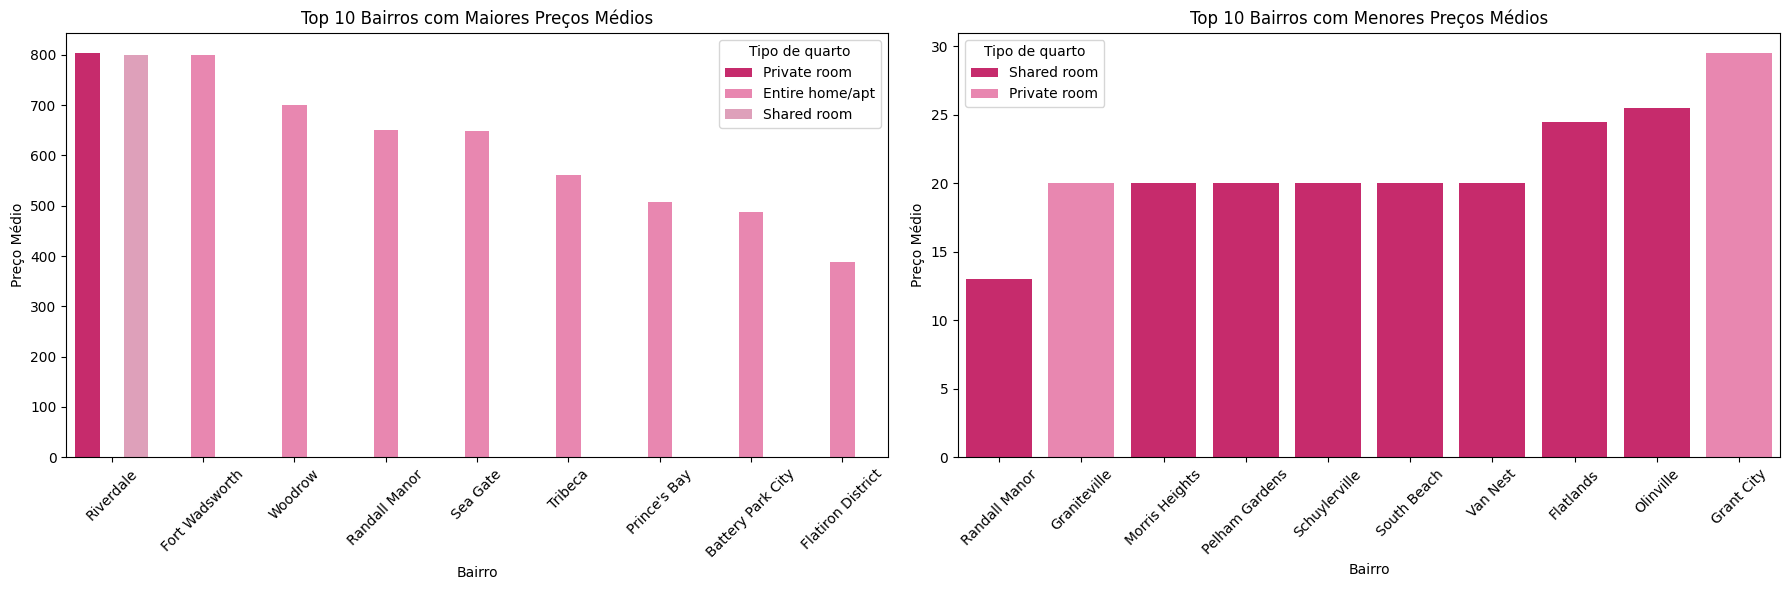

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

sns.barplot(data=top10_maiores, x='bairro', y='price', hue='room_type', ax=axes[0],  palette=paleta_personalizada)
axes[0].set_title('Top 10 Bairros com Maiores Preços Médios')
axes[0].set_xlabel('Bairro')
axes[0].set_ylabel('Preço Médio')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Tipo de quarto')

sns.barplot(data=top10_menores, x='bairro', y='price', hue='room_type', ax=axes[1],  palette=paleta_personalizada)
axes[1].set_title('Top 10 Bairros com Menores Preços Médios')
axes[1].set_xlabel('Bairro')
axes[1].set_ylabel('Preço Médio')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Tipo de quarto')

plt.tight_layout()
plt.show()

> 4. Nota-se que os tipos de quarto compartilhado e privado são os que possuem os menores preços. Bairros como Randall Manor, Graniteville e Morris Heights oferecem boas opções para economizar. Por outro lado, bairros como Fort Wadsworth, Woodrow e Randall Manor, com imóveis do tipo "casa/apartamento", possuem os maiores preços, possivelmente devido a serviços de melhor qualidade, estrutura superior e localizações privilegiadas. Esses imóveis podem ser uma ótima opção se a limitação financeira não for um problema.

C:\Users\micae\AppData\Local\Temp\ipykernel_5656\1302172355.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\micae\AppData\Local\Temp\ipykernel_5656\1302172355.py:2: UserWarning:

The palette list has more values (6) than needed (3), which may not be intended.



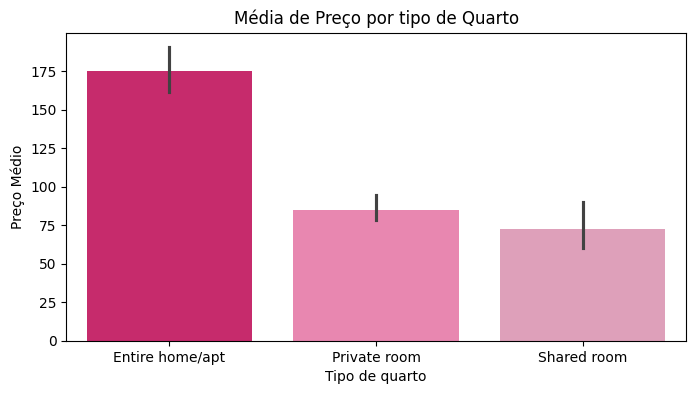

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=media_preco_quarto, x='room_type', y='price', palette=paleta_personalizada)
plt.title('Média de Preço por tipo de Quarto')
plt.xlabel('Tipo de quarto')
plt.ylabel('Preço Médio')
plt.show()

> 4. Observa-se que "Entire home/apt" possui o maior preço médio em relação aos outros tipos de quarto, seguido por quarto privado e depois compartilhado. Quartos privados parecem ser a melhor opção para quem deseja economizar, mas quartos compartilhados podem não ser ideais para quem busca mais privacidade.

* **5ª Pergunta**: A quantidade de anúncios ativos afeta o valor do imóvel?

In [24]:
media_host = dados.groupby('calculado_host_listings_count')['price'].mean().reset_index()

C:\Users\micae\AppData\Local\Temp\ipykernel_5656\3113404512.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



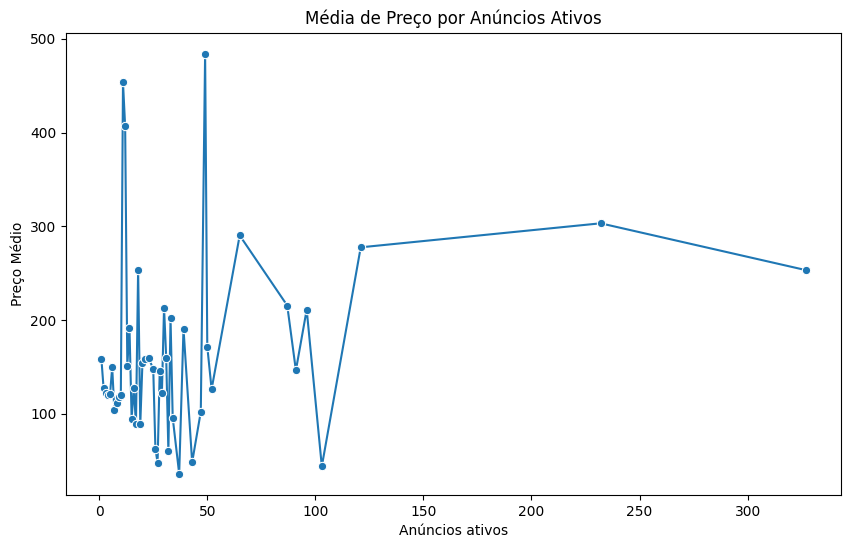

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(data=media_host, x='calculado_host_listings_count', y='price', marker='o')
plt.title('Média de Preço por Anúncios Ativos')
plt.xlabel('Anúncios ativos')
plt.ylabel('Preço Médio')
plt.show()

> 5. Há uma concentração maior de anúncios com preços mais altos antes dos 50 anúncios por host. Após aproximadamente 120 anúncios, o preço se mantém em torno de 280. Isso indica que os preços mais baixos estão associados a hosts com menos de 100 anúncios, embora alguns hosts nessa faixa também tenham preços altos.

In [26]:
dados['faixa_calculado_host_listings_count'] = pd.cut(dados['calculado_host_listings_count'], bins=range(0, 101, 10))

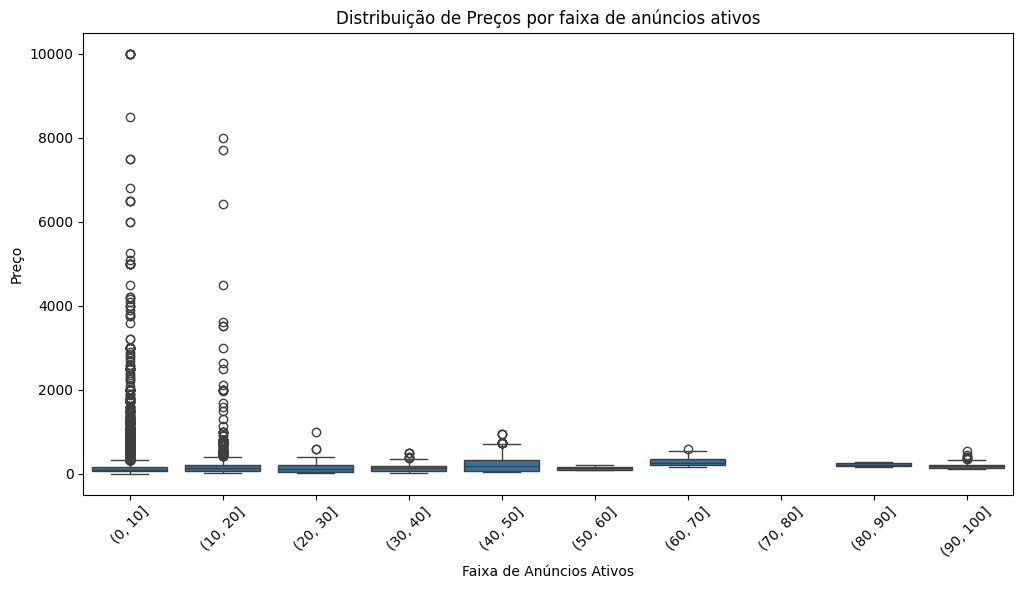

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dados, x='faixa_calculado_host_listings_count', y='price')
plt.title('Distribuição de Preços por faixa de anúncios ativos')
plt.xlabel('Faixa de Anúncios Ativos')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

> 5. A distribuição dos preços por faixa de anúncios mostra que as maiores variações de preço estão nas faixas de 0 a 10 e 10 a 20 anúncios.

* **6ª Pergunta**: Como o número de reviews se relaciona com o preço?

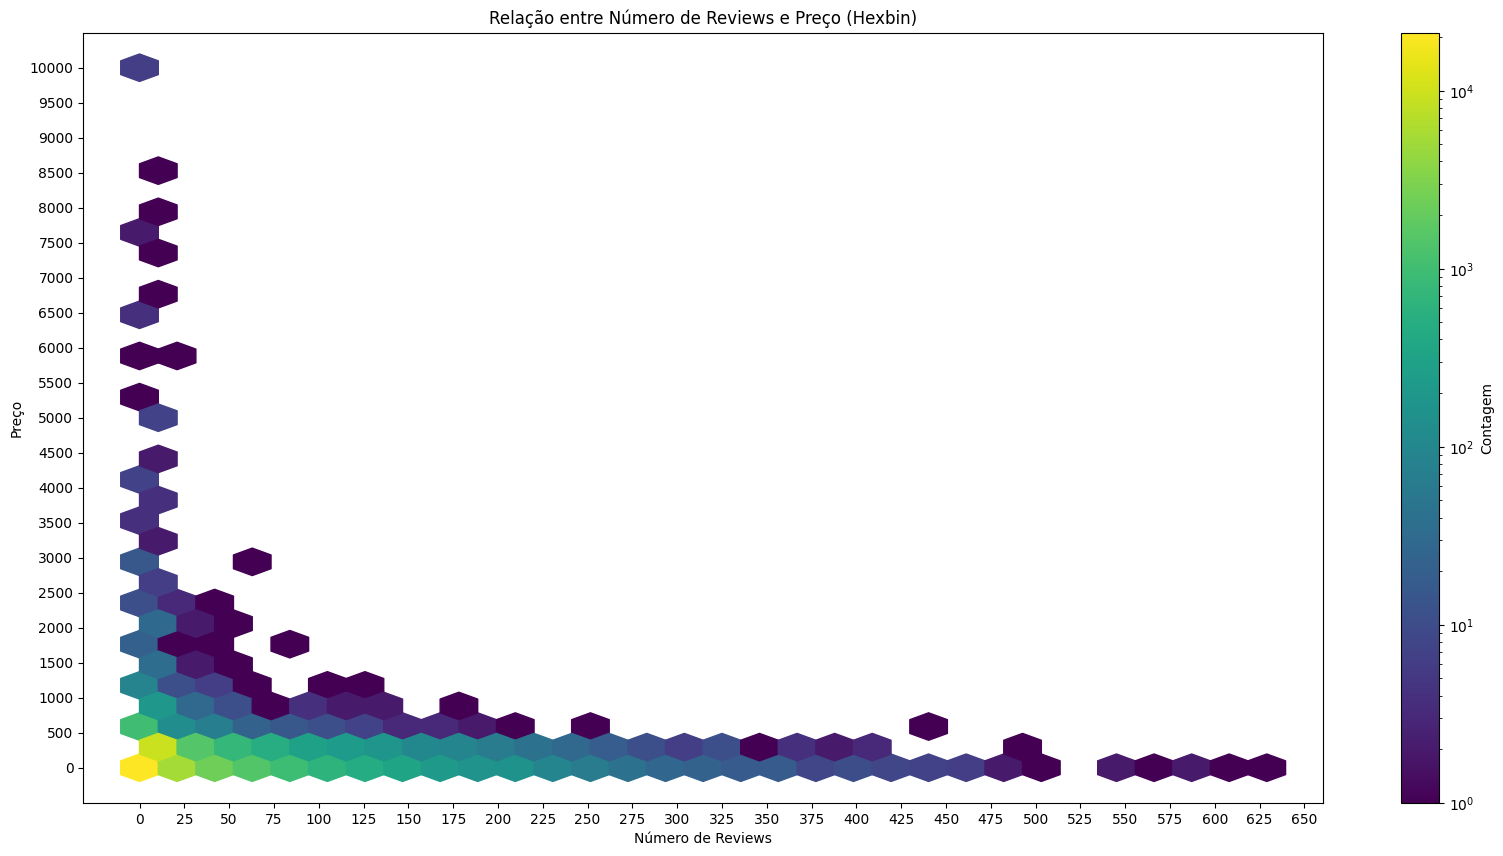

In [55]:
plt.figure(figsize=(20,10))
plt.hexbin(dados['numero_de_reviews'], dados['price'], gridsize=30, bins='log')
plt.colorbar(label='Contagem')
plt.title('Relação entre Número de Reviews e Preço (Hexbin)')
plt.xlabel('Número de Reviews')
plt.ylabel('Preço')
plt.yticks(range(0, int(dados['price'].max()) +500, 500))
plt.xticks(range(0, int(dados['numero_de_reviews'].max()) +25, 25))
plt.show()

> 6. A densidade dos dados mostra que os pontos mais claros indicam uma maior concentração de preços e número de reviews. Observa-se que a maioria dos imóveis tem um número de reviews menor que 150 e preços abaixo de 1000. No entanto, imóveis com mais reviews e preços mais altos também são comuns. Além disso, um número maior de reviews não necessariamente está associado a preços mais altos, já que os preços mais elevados estão concentrados em imóveis com menos de 50 reviews.

* **7ª Pergunta**: Existe uma tendência temporal nas últimas reviews? Por exemplo, há mais reviews em determinados meses ou anos?

In [35]:
dados['ultima_review'] = pd.to_datetime(dados['ultima_review'])

In [36]:
dados['ano_review'] = dados['ultima_review'].dt.year
dados['mes_review'] = dados['ultima_review'].dt.month

In [37]:
reviews_por_ano = dados.groupby(['bairro_group','ano_review']).size().reset_index(name='count')

C:\Users\micae\AppData\Local\Temp\ipykernel_5656\1480658711.py:2: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.



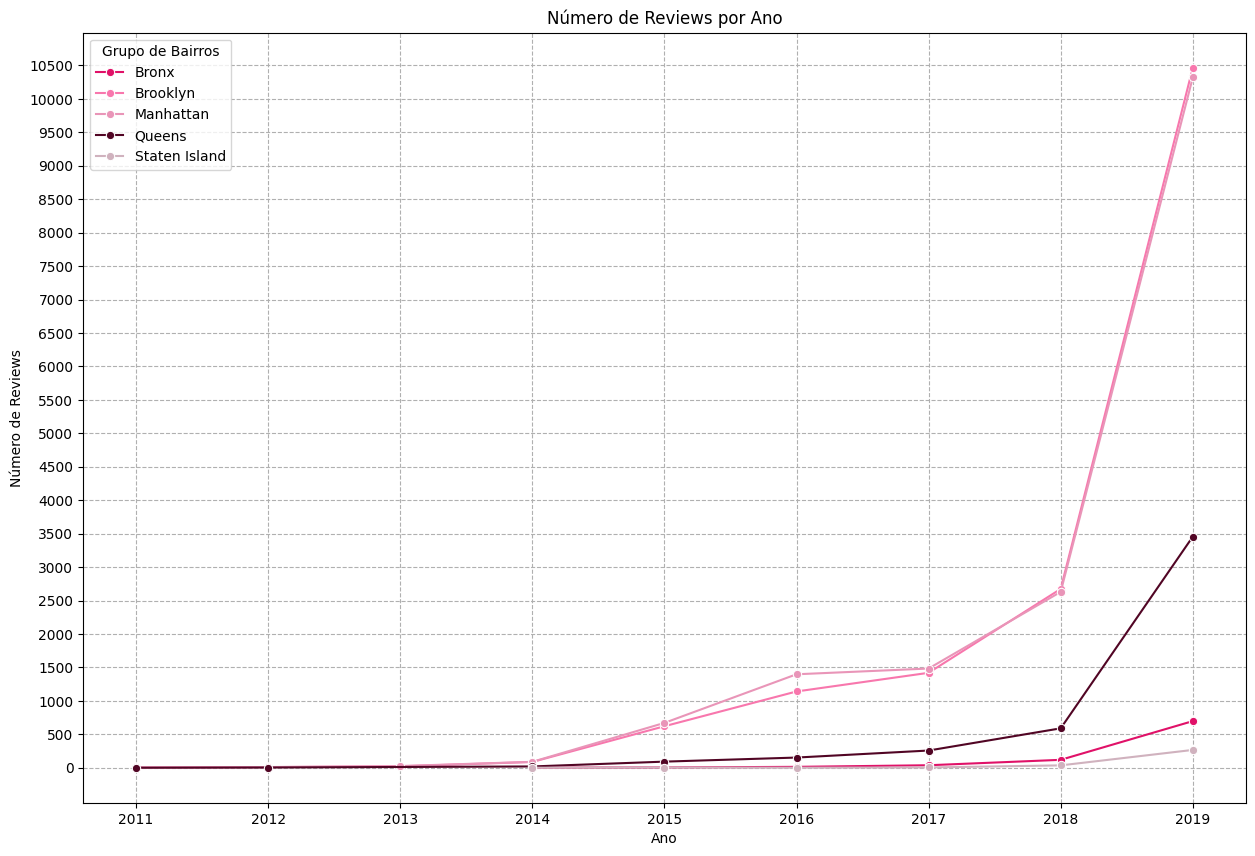

In [38]:
plt.figure(figsize=(15,10))
sns.lineplot(data=reviews_por_ano, x='ano_review', y='count', hue='bairro_group', marker='o', palette=paleta_personalizada)
plt.title('Número de Reviews por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Reviews')
plt.yticks(range(0, int(reviews_por_ano['count'].max()) +500, 500))
plt.grid(True, which="both", ls="--")
plt.legend(title='Grupo de Bairros')
plt.show()

> 7. O número de reviews aumentou ao longo dos anos, o que é comum com o avanço da tecnologia e o aumento de pessoas conectadas. Bairros como Brooklyn e Manhattan mantêm uma competição acirrada, com o Brooklyn tendo uma leve vantagem em 2019. Por outro lado, Staten Island e Bronx não apresentaram um aumento significativo de reviews até 2019, quando houve um pequeno crescimento.

In [39]:
reviews_por_mes = dados.groupby(['bairro_group','mes_review']).size().reset_index(name='count')

C:\Users\micae\AppData\Local\Temp\ipykernel_5656\2552164473.py:2: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.



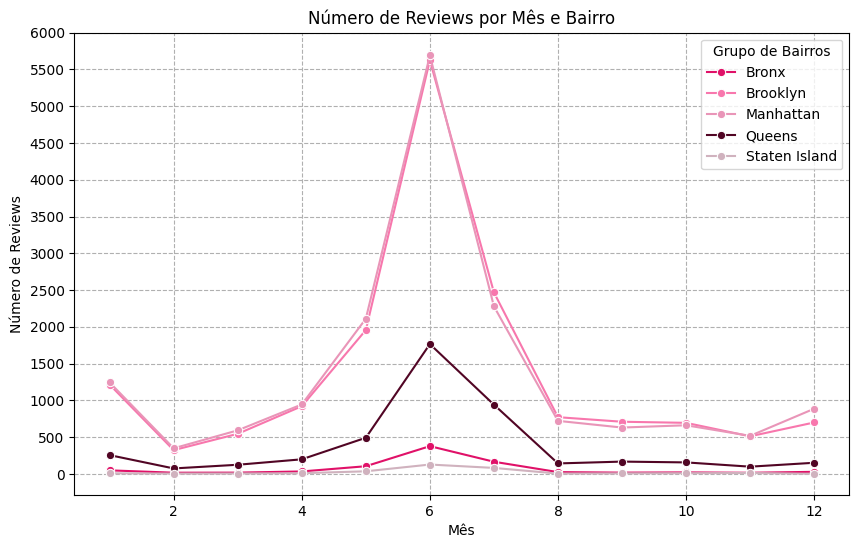

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(data=reviews_por_mes, x='mes_review', y='count', hue='bairro_group',marker='o', palette=paleta_personalizada)
plt.title('Número de Reviews por Mês e Bairro')
plt.xlabel('Mês')
plt.ylabel('Número de Reviews')
plt.yticks(range(0, int(reviews_por_mes['count'].max()) +500, 500))
plt.grid(True, which="both", ls="--")
plt.legend(title='Grupo de Bairros')
plt.show()

> 7. O agrupamento de reviews por mês mostra que o meio do ano é o período com maior quantidade de reviews, sugerindo que é um período mais movimentado

8. Existe uma tendência temporal dos valores de preço ? por exemplo, o valor é maior em determinados meses ou anos?

In [41]:
media_preco_ano = dados.groupby(['bairro_group','ano_review'])['price'].mean().reset_index()

C:\Users\micae\AppData\Local\Temp\ipykernel_5656\2125238928.py:2: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.



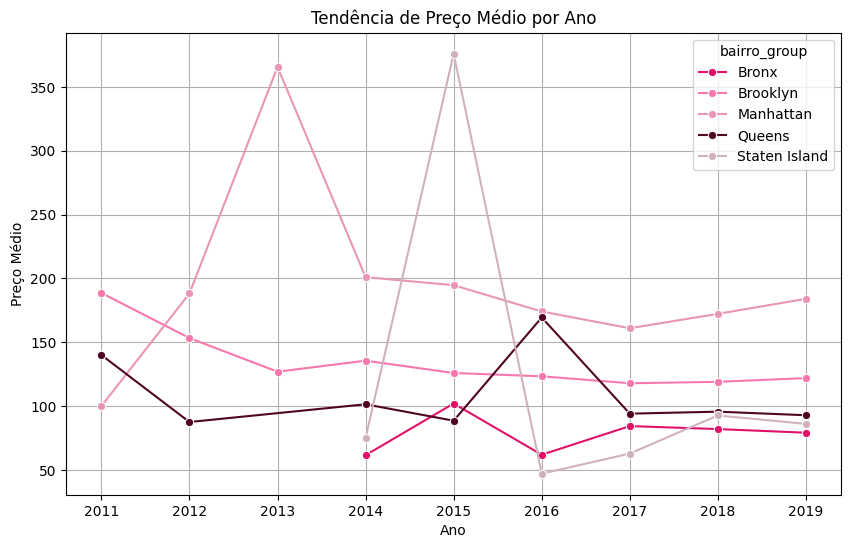

In [42]:
plt.figure(figsize=(10,6))
sns.lineplot(data=media_preco_ano, x='ano_review', y='price', hue='bairro_group', marker='o', palette=paleta_personalizada)
plt.title('Tendência de Preço Médio por Ano')
plt.xlabel('Ano')
plt.ylabel('Preço Médio')
plt.grid(True)
plt.show()

> 8. Os bairros Staten Island e Bronx começaram a receber avaliações a partir de 2014, mais tarde que os outros bairros. Enquanto o Bronx manteve um valor médio de preço baixo, Staten Island atingiu um pico de 375 em 2015, mas sofreu uma queda significativa em 2016 e não se recuperou nos anos seguintes. Brooklyn e Manhattan mantiveram as maiores médias de preço, com Manhattan atingindo seu pico em 2013 (360) e Brooklyn em 2011 (180), com uma leve recuperação em 2019.

In [43]:
media_preco_mes = dados.groupby(['bairro_group','mes_review'])['price'].mean().reset_index()

C:\Users\micae\AppData\Local\Temp\ipykernel_5656\625076146.py:2: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.



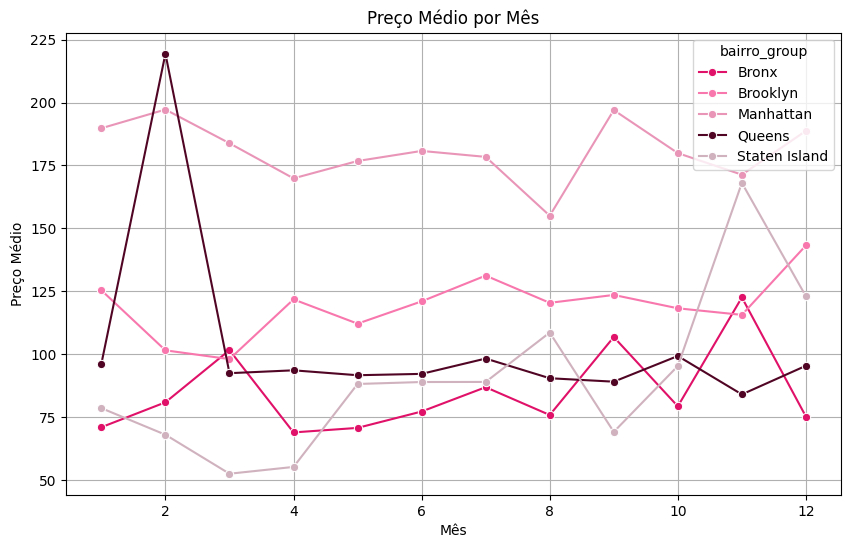

In [44]:
plt.figure(figsize=(10,6))
sns.lineplot(data=media_preco_mes, x='mes_review', y='price', hue='bairro_group',marker='o', palette=paleta_personalizada)
plt.title('Preço Médio por Mês')
plt.xlabel('Mês')
plt.ylabel('Preço Médio')
plt.grid(True)
plt.show()

> 8. No último trimestre do ano, os bairros Manhattan, Staten Island, Brooklyn e Bronx têm os maiores valores médios, respectivamente, enquanto o Queens apresenta um valor médio consideravelmente maior no primeiro trimestre.

9. Qual a correlação entre todas as variáveis numéricas em relação ao preço?

In [45]:
dados_numerico = dados.select_dtypes(include=['float64','int64'])

In [46]:
correlacao = dados_numerico.corr()

In [48]:
cores_personalizadas = sns.color_palette("magma", as_cmap=True)

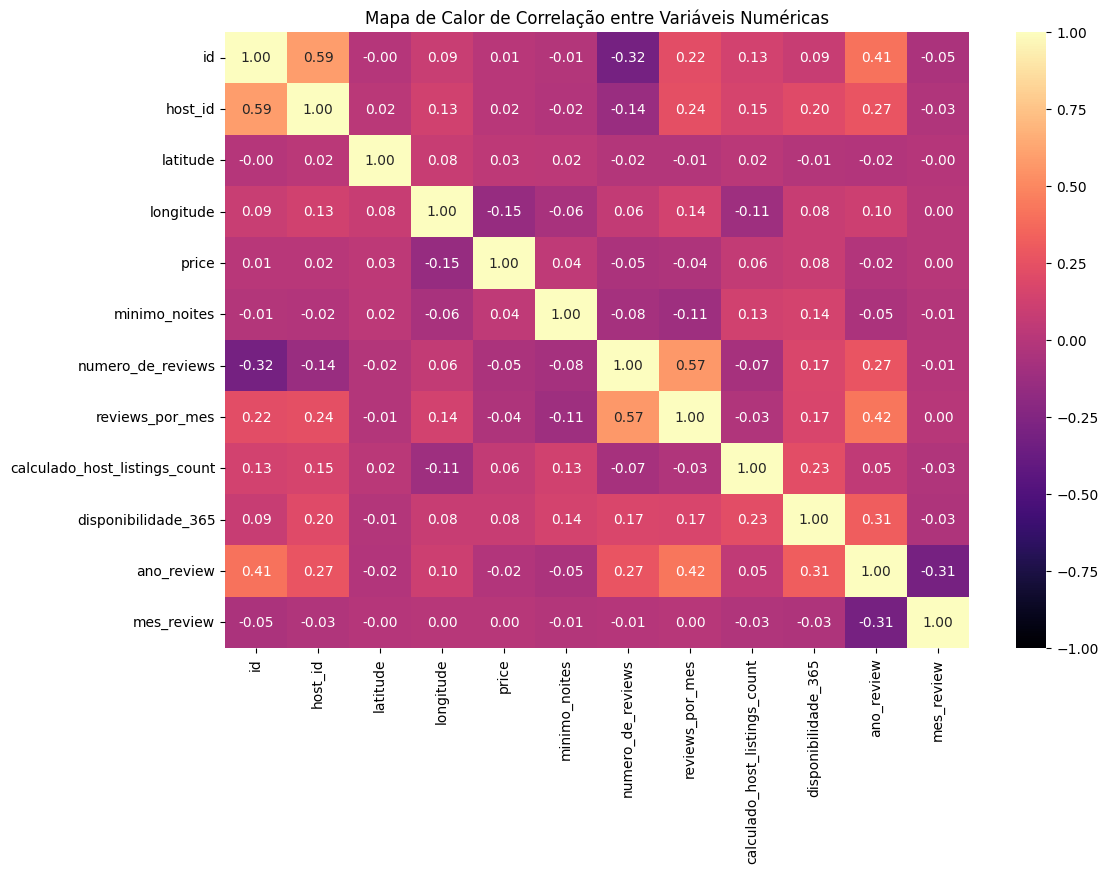

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(correlacao, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap=cores_personalizadas)
plt.title('Mapa de Calor de Correlação entre Variáveis Numéricas')
plt.show()

In [53]:
correlacao_preco = correlacao['price'].sort_values(ascending=False)
print(correlacao_preco)

price                            1.000000
disponibilidade_365              0.081833
calculado_host_listings_count    0.057472
minimo_noites                    0.042799
latitude                         0.033939
host_id                          0.015309
id                               0.010618
reviews_por_mes                 -0.036814
numero_de_reviews               -0.047954
longitude                       -0.150020
Name: price, dtype: float64


> 9. A análise de correlação mostra que a variável 'disponibilidade_365' tem uma forte relação com o preço, seguida por 'calculado_host_listings_count' e 'minimo_noites', embora essas últimas tenham uma influência menor.

## 4. Insights

### 1ª Pergunta: 

* **Partida**: Onde seria mais indicada a compra de um apartamento para alugar na plataforma?
* **Hipótese**: Bairros populares como Manhattan e Brooklyn possuem preços maiores e mais disponibilidade de aluguéis.

**Validação**:

* **Verdadeira parcialmente**. Manhattan e Brooklyn têm preços mais altos e maior número de imóveis, mas também há opções mais baratas longe do centro.

* **Insight**: Para economizar, bairros como Bronx, Staten Island e Queens são melhores opções, com Queens oferecendo maior variedade.

### 2ª Pergunta:
* **Partida**: O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
* **Hipótese**: Quanto maior o número mínimo de noites, maior será o preço, e aluguéis com menor disponibilidade também são mais caros.

**Validação**:

* **Verdadeira**. Manhattan e Brooklyn têm maior número mínimo de noites (8,5 e 6,5) e preços mais altos, com menor disponibilidade (114 e 100 dias).

* **Insight**: Bairros como Bronx, Queens e Staten Island têm maior disponibilidade e preços mais baixos, sendo ideais para quem quer economizar.

### 3ª Pergunta:
* **Partida**:Existe algum padrão no texto do nome do local para lugares de maior valor?
* **Hipótese**: O texto do nome do local não influencia no valor do aluguel.

**Validação**:

* **Falsa parcialmente**. Imóveis com "Luxury" no nome têm preços médios mais altos, sugerindo que o nome pode atrair mais atenção.

* **Insight**: A nomeação pode ser estratégica para aumentar a visibilidade e a competitividade, influenciando indiretamente o preço.

### 4ª Pergunta:
* **Partida**: Qual o tipo de quarto com os maiores preços de acordo com o bairro?
* **Hipótese**: Quartos do tipo 'Entire home/apt' possuem valores maiores do que os demais tipos de quarto.

**Validação**:

* **Verdadeira**. 'Entire home/apt' tem o maior preço médio, seguido por quarto privado e compartilhado.

* **Insight**: Quartos privados são a melhor opção para economizar, enquanto 'Entire home/apt' é ideal para quem busca maior conforto e estrutura.

### 5ª Pergunta:
* **Partida**: A quantidade de anúncios ativos afeta o valor do imóvel?
* **Hipótese**: Quanto mais anúncios ativos, maior será o valor do imóvel.

**Validação**:

* **Falsa parcialmente**. Anúncios abaixo de 100 têm preços mais baixos, mas há exceções com preços altos. Após 120 anúncios, os preços se estabilizam em torno de 280.

* **Insight**: A quantidade de anúncios não é um fator determinante para o preço, mas há uma tendência de preços mais baixos em hosts com menos anúncios.

### 6ª Pergunta:
* **Partida**: Como o número de reviews se relaciona com o preço?
* **Hipótese**: Imóveis com mais reviews tendem a ter preços mais altos devido à maior popularidade.

**Validação**:

* **Falsa**. Imóveis com mais reviews não necessariamente têm preços mais altos. Os preços mais elevados estão concentrados em imóveis com menos de 50 reviews.

* **Insight**: A popularidade (número de reviews) não é um indicador direto de preço, mas pode influenciar a visibilidade do imóvel.

### 7ª Pergunta:
* **Partida**: Existe uma tendência temporal nas últimas reviews?
* **Hipótese**: Imóveis com mais avaliações costumam ter uma circulação maior no período das férias e um aumento ao longo dos anos.

**Validação**:

* **Verdadeira**. Há um aumento de reviews ao longo dos anos, com picos no meio do ano (período de férias).

* **Insight**: O meio do ano é o período mais movimentado, com maior número de reviews, indicando maior demanda.


### 8ª Pergunta:
* **Partida**: Existe uma tendência temporal nos valores de preço?
* **Hipótese**: O valor dos aluguéis vem aumentando a cada ano.

**Validação**:

* **Falsa parcialmente**. Brooklyn e Manhattan tiveram picos de preço em 2011 e 2013, respectivamente, mas apresentaram quedas nos anos seguintes. Staten Island teve um pico em 2015, mas também decaiu.

* **Insight**: Não há uma tendência clara de aumento anual nos preços. Os valores variam significativamente ao longo dos anos.

### 9ª Pergunta:
* **Partida**: Qual a correlação entre todas as variáveis numéricas em relação ao preço?
* **Hipótese**: Quanto maiores as variáveis numéricas (número de anúncios, avaliações, mínimo de noites), maior será o valor do preço.

**Validação**:

* **Falsa parcialmente**. Apenas a variável 'disponibilidade_365' tem uma correlação forte com o preço. As outras variáveis têm influência menor.

* **Insight**: A disponibilidade ao longo do ano é o fator que mais influencia o preço, seguido pelo número de anúncios e mínimo de noites